In [1]:
import pandas as pd 

data = pd.read_csv('SPam.csv')

In [2]:
data["text_len"] = data["text"].apply(lambda x : len(x.split()))
print("The longest headline has: {} words".format(data.text_len.max()))

The longest headline has: 21913 words


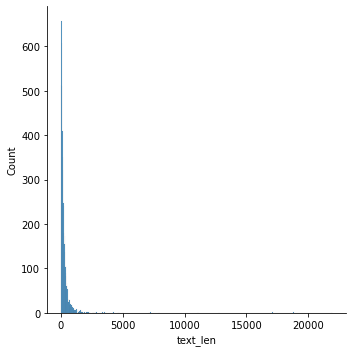

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(data.text_len, kde=False)

In [5]:
import warnings
warnings.filterwarnings("ignore")

!pip install bertopic

  Using cached bertopic-0.16.3-py3-none-any.whl.metadata (23 kB)
  Using cached hdbscan-0.8.38.post1.tar.gz (5.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached umap_learn-0.5.6-py3-none-any.whl.metadata (21 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
  Using cached numpy-1.20.3-cp39-cp39-win_amd64.whl.metadata (2.0 kB)
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.13.0-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.11.4-cp39-cp39-win_amd64.whl.metadata (60 kB)

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
lbl2vec 1.0.2 requires numpy>=1.21.0, but you have numpy 1.20.3 which is incompatible.
spacy 3.3.0 requires pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4, but you have pydantic 1.10.12 which is incompatible.
tensorflow-intel 2.15.0 requires keras<2.16,>=2.15.0, but you hav

In [9]:
%%time
from bertopic import BERTopic
from hdbscan import HDBSCAN

#hdbscan_model = HDBSCAN(min_cluster_size=5, min_samples=3, cluster_selection_epsilon=0.7)
#model = BERTopic(hdbscan_model=hdbscan_model, min_topic_size=5, verbose=True, embedding_model='all-MiniLM-L6-v2')
model = BERTopic(verbose=True,embedding_model='all-MPNet-base-v2', min_topic_size= 7)
headline_topics, _ = model.fit_transform(data.text)

2024-08-11 08:46:18,225 - BERTopic - Embedding - Transforming documents to embeddings.


.gitattributes:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/187 [00:00<?, ?it/s]

2024-08-11 09:42:45,075 - BERTopic - Embedding - Completed ✓
2024-08-11 09:42:45,075 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-11 09:42:53,197 - BERTopic - Dimensionality - Completed ✓
2024-08-11 09:42:53,212 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-11 09:42:53,467 - BERTopic - Cluster - Completed ✓
2024-08-11 09:42:53,467 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-11 09:42:54,399 - BERTopic - Representation - Completed ✓


Wall time: 56min 37s


In [10]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 166


,Topic,Count,Name,Representation,Representative_Docs
0,-1,1788,-1_number_vince_enron_ect,"[number, vince, enron, ect, be, to, you, and, ...",[subject wall street s dirty little secret it ...
1,0,136,0_loan_credit_mortgage_rate,"[loan, credit, mortgage, rate, refinance, home...",[subject you be approve for your loan approval...
2,1,113,1_deal_mmbtu_gas_ect,"[deal, mmbtu, gas, ect, meter, hou, paso, dare...",[vance deal has been modified to reflect less ...
3,2,110,2_viagra_dysfunction_erectile_struggle,"[viagra, dysfunction, erectile, struggle, mens...",[subject be you ready to get it hello viagra b...
4,3,86,3_click_free_porn_here,"[click, free, porn, here, http, email, adult, ...",[subject hardcore sex orgies hot girls fuck ha...


In [11]:
a_topic = freq.iloc[1]["Topic"] 
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores


[('loan', 0.022459760437925583),
 ('credit', 0.021624945903723224),
 ('mortgage', 0.020949199221049725),
 ('rate', 0.017276089280907604),
 ('refinance', 0.016463986588733458),
 ('home', 0.014648804938241196),
 ('your', 0.01333913501673435),
 ('you', 0.012947320475851495),
 ('low', 0.010588532619673238),
 ('get', 0.00990147003841582)]